# Task 5 : To Explore Business Analytics

Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’

You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

In [1]:
# Importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [2]:
# importing the dataset
data = pd.read_csv("dataset/SampleSuperstore.csv")
data.head(8)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152


### Data Preprocessing

In [3]:
data.shape

(9994, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### By looking on the information we can say that there are no missing values

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.duplicated().sum() # Checking for duplicates

17

In [8]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True) # Dropping the duplicate values

In [9]:
data.duplicated().sum()

0

In [10]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
data.shape

(9977, 13)

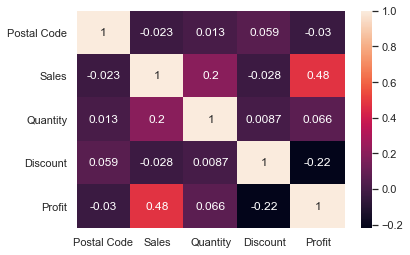

In [12]:
corr = data.corr()
sns.heatmap(corr, annot = True)
plt.show()

### Exploratory Data Analysis

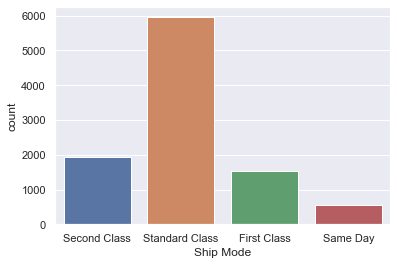

In [13]:
sns.countplot(x = data["Ship Mode"])
plt.show()

#### By looking at above graph we can say that maximum Ship Mode is of "*Standard Class*" and minimum is of "*Same Day*".

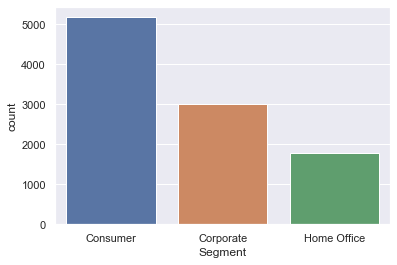

In [14]:
sns.countplot(x = data['Segment'])
plt.show()

#### We can conclude that max Segment is of "Consumer" and minimum is of "Home Office".

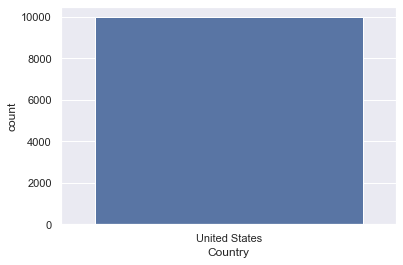

In [15]:
sns.countplot(x = data['Country'])
plt.show()

#### This shows the data contain the information only about "United States".

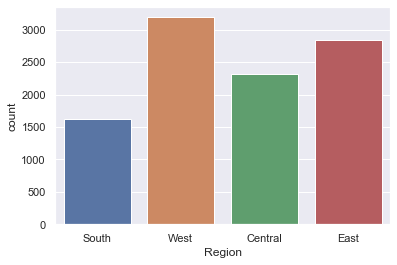

In [16]:
sns.countplot(x = data.Region)
plt.show()

#### This shows that most the entries are from west region of United States.

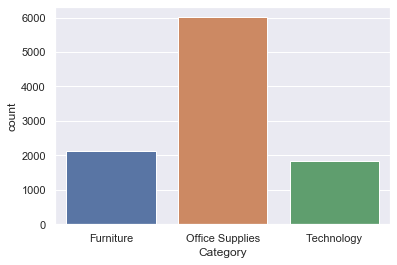

In [17]:
sns.countplot(x = data.Category)
plt.show()

#### We can say that most of the categories of data in the dataset are from "Office Supplies"

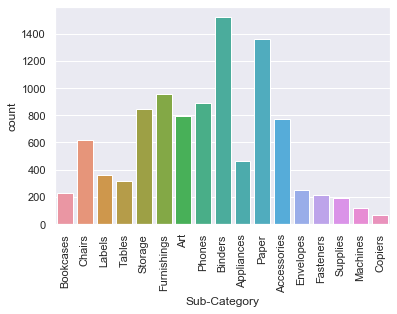

In [18]:
sns.countplot(x = data['Sub-Category'])
plt.xticks(rotation = 90)
plt.show()

#### Maximum peoples are "*Builders*" Than comes "*Paper*" and Minimum are "*Copiers*".

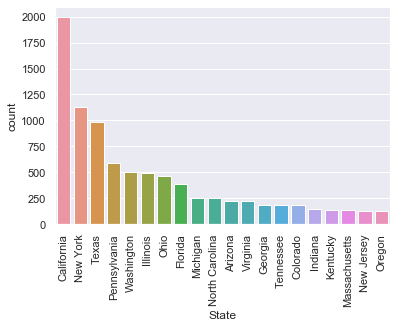

In [20]:
sns.countplot(x = data.State, order = (data.State.value_counts().head(20)).index)
plt.xticks(rotation = 90)
plt.show()

#### Maximum number of people are from "*California*" and "*New York*".

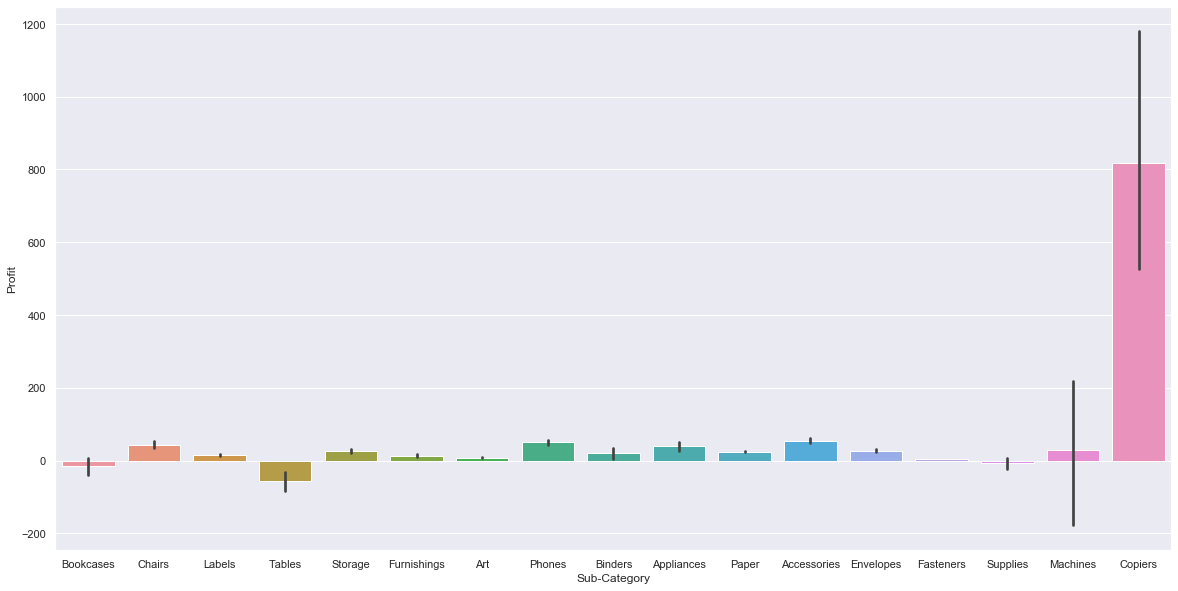

In [25]:
plt.figure(figsize = (20, 10))
sns.barplot(x = data['Sub-Category'], y = data.Profit)
plt.show()

#### We can conclude that products such as  Bookcases and Tables are facing looses and Company have a lot of profit in the sale of Copiers but the numbers of sales is very less so we need to increase the number of sales of copier. 

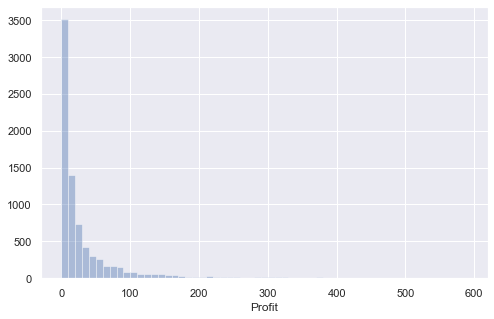

In [37]:
plt.figure(figsize = (8, 5))
sns.distplot(data.Profit, bins = (np.arange(0, 600, 10)), kde = False).set(xlabel = "Profit")
plt.show()

#### Hence we can find that most of the profit lies in the range of 0-100

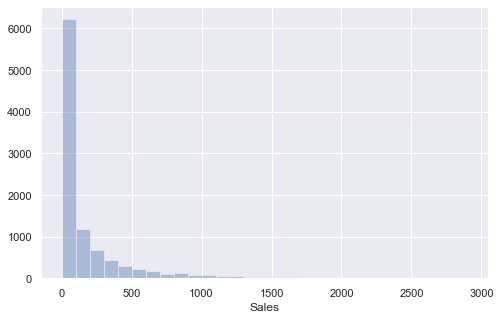

In [36]:
plt.figure(figsize = (8, 5))
sns.distplot(data.Sales, bins = (np.arange(0, 3000, 100)), kde = False).set(xlabel = "Sales")
plt.show()

#### This shows that the maximum sales range from 0-400

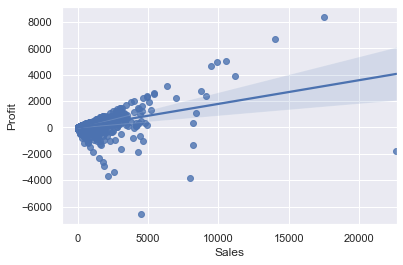

In [38]:
sns.regplot(data.Sales, data.Profit)
plt.show()

#### The above regression plot shows that with increase in profit sales also increases, but the relation is not linear, so both are not directly proportional.

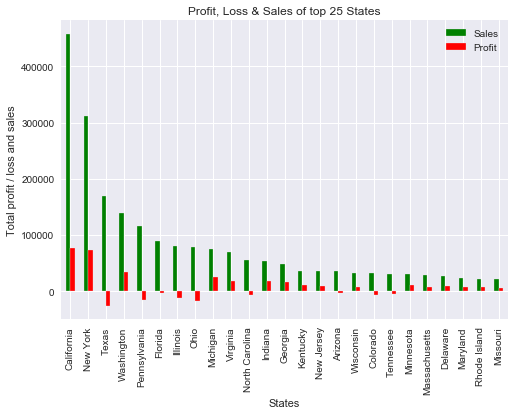

In [62]:
state = data.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False)
state[:25].plot(kind = "bar", color = ["green", "red"])
plt.title("Profit, Loss & Sales of top 25 States")
plt.xlabel("States")
plt.ylabel("Total profit / loss and sales")
plt.show()

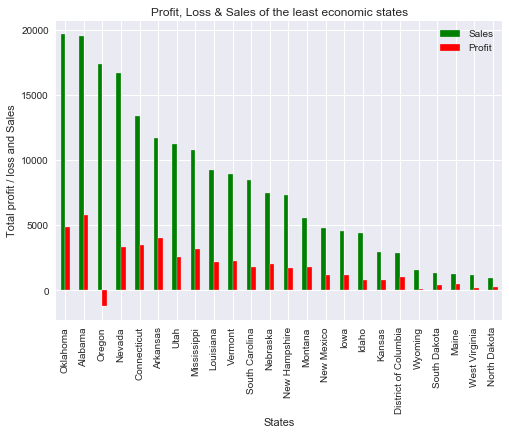

In [63]:
state[25:].plot(kind = "bar", color = ["green", "red"])
plt.title("Profit, Loss & Sales of the least economic states")
plt.xlabel("States")
plt.ylabel("Total profit / loss and Sales")
plt.show()

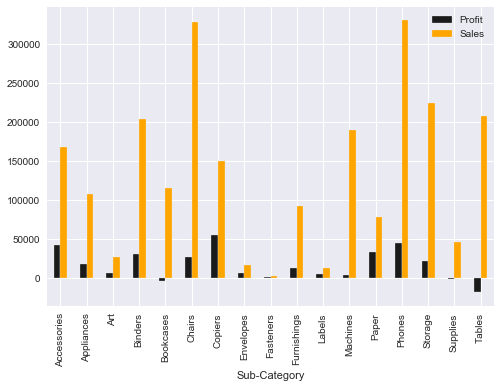

In [65]:
data.groupby('Sub-Category')[['Profit', 'Sales']].sum().plot.bar(color = ["k", "orange"])
plt.show()

#### From above graph we can say that Chairs and Phones have highest sales and profit if good for Copiers, Phones, Accessories whereas Tables and Bookcases faces losses.

In [66]:
pd.DataFrame(data.groupby('State').sum())['Profit'].sort_values(ascending = True)

State
Texas                  -25750.9833
Ohio                   -16959.3178
Pennsylvania           -15565.4035
Illinois               -12601.6500
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1194.0993
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [67]:
pd.DataFrame(data.groupby('State').sum())['Discount'].sort_values(ascending = True)

State
Alabama                   0.00
Missouri                  0.00
Maine                     0.00
Louisiana                 0.00
Kentucky                  0.00
Kansas                    0.00
Iowa                      0.00
Indiana                   0.00
Wisconsin                 0.00
Mississippi               0.00
Nebraska                  0.00
North Dakota              0.00
District of Columbia      0.00
Oklahoma                  0.00
South Carolina            0.00
South Dakota              0.00
Vermont                   0.00
Arkansas                  0.00
Virginia                  0.00
Georgia                   0.00
Minnesota                 0.00
Wyoming                   0.20
West Virginia             0.30
New Hampshire             0.30
Maryland                  0.60
Connecticut               0.60
New Jersey                0.60
Delaware                  0.60
Montana                   1.00
Rhode Island              1.20
Idaho                     1.80
Michigan                  1.80
Ma

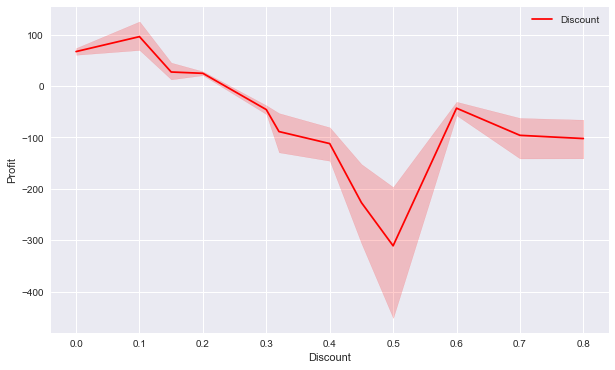

In [68]:
plt.figure(figsize = (10, 6))
sns.lineplot('Discount', 'Profit', data = data, color = 'red', label = 'Discount')
plt.legend()
plt.show()

#### The above graph states that the profit decreases with the increase in discount.

## Insights derived from above EDA :

1. Improvements should be made for same day shipment mode.
2. We have to work more in the Southern region of USA for better business.
3. Office Supplies are good. We have to work more on Technology and Furniture Category of business.
4. There are very less people working as Copiers. So, the recruitment should be increased.
5. Maximum number of people are from California and New York. We should expand in other parts of USA as well.
6. Company is facing losses in sales of bookcases and tables products.
7. Company have a lots of profit in the sale of copier but the number of sales is very less so there is a need of increase   innumber of sales of copier.
8. Profit and Sales are related to each other but they are not directly proportional.Hence we have to work on both sales and profit seperately to increase them.
9. The company facing loss in top 25 states is in compare to the least economic states.
10. When the profits of a state are compared with the discount provided in each state, the states which has allowed more discount, went into loss.
11. Profit and discount show very weak and negative relationship. This should be kept in mind that before taking any other decision related to business.